In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_series(time, series):
    plt.figure(figsize=(10, 6))
    plt.plot(time, series)
    plt.xlabel("time")
    plt.ylabel("value")
    plt.grid(True)
    plt.show()

In [3]:
def trend(time, slope=0):
    return slope * time

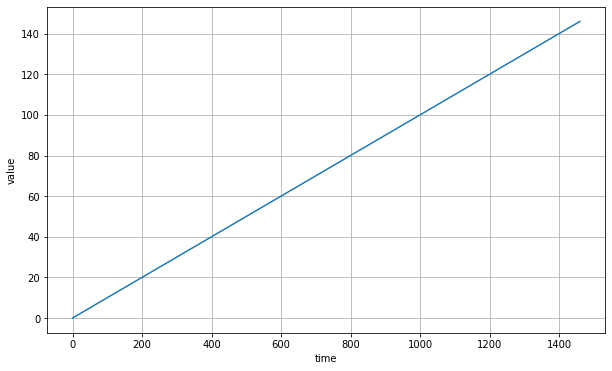

In [4]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = trend(time, 0.1)
plot_series(time, series)

### Seasonal pattern
These functions contain a seasonal pattern and then seasonality that just uses the same pattern. As we investigate the graph,
we can see clear peaks and troughs. But in addition to that, there are smaller, regular spikes.

This could be seen as a rough simulation of a seasonal value. For example, maybe profits for shop that are negative on the day the store is closed, peaking a little the day after, decaying during the week and then peaking again on the weekend. 

In [5]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

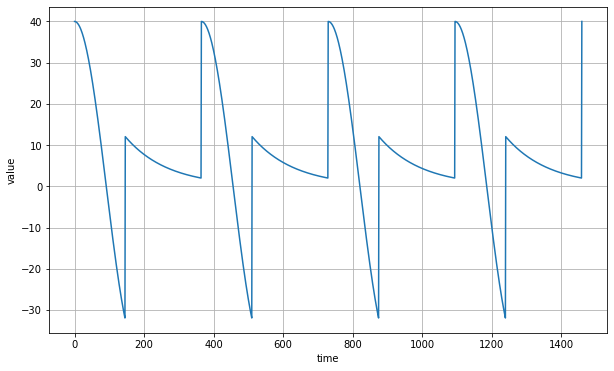

In [6]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)

Some time series can have a combination of both trend and seasonality as this chart shows below

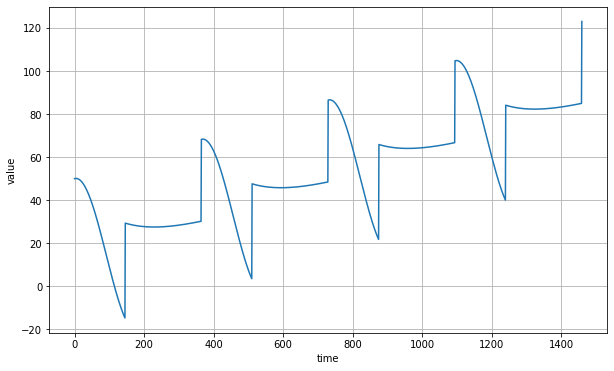

In [7]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)

### Noise

Here's a function that add some noise to a series and when we call that and plot the results and their impact on our time series, we now get a very noisy series, but one which follows the same seasonality as we saw earlier.

It's interesting because at this point, the human eye may miss a lot of the seasonality data but a computer will hopefully be able to spot it.


In [8]:
def noise(time, noise_level=1):
    return np.random.randn(len(time)) * noise_level

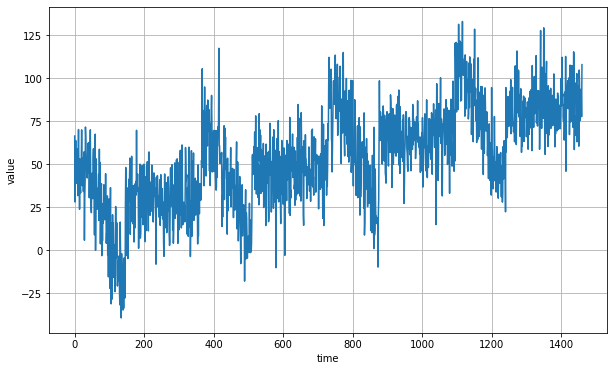

In [9]:
noise_level = 15
noisy_series = series + noise(time, noise_level)
plot_series(time, noisy_series)

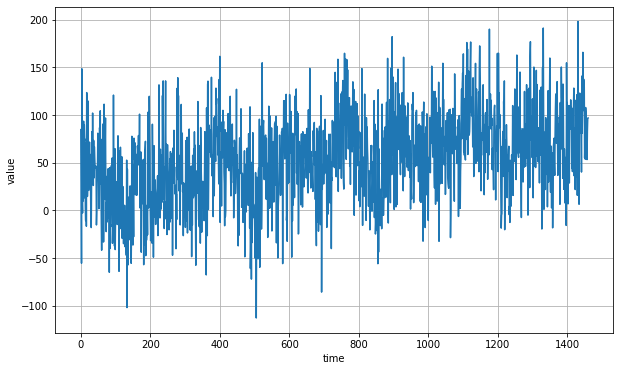

In [10]:
noise_level = 40
noisy_series = series + noise(time, noise_level)
plot_series(time, noisy_series)

### Autocorrelation
Autocorrelation, also known as serial correlation, is the correlation of a signal with a delayed copy of itself as a function of delay. Informally, it is the similarity between observations as a function of the time lag between them. 

The analysis of autocorrelation is a mathematical tool for finding repeating patterns, such as the presence of a periodic signal obscured by noise, or identifying the missing fundamental frequency in a signal implied by its harmonic frequencies. It is often used in signal processing for analyzing functions or series of values, such as time domain signals. 

[Wiki-Autocorrelation](https://en.wikipedia.org/wiki/Autocorrelation)

In [11]:
def autocorrelation(time, amplitude):
    rho1 = 0.5
    rho2 = -0.1
    ar = np.random.randn(len(time) + 50)
    ar[:50] = 100
    for step in range(50, len(time) + 50):
        ar[step] += rho1 * ar[step - 50]
        ar[step] += rho2 * ar[step - 33]
    return ar[50:] * amplitude

In [12]:
def autocorrelation(time, amplitude):
    rho = 0.8
    ar = np.random.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += rho * ar[step - 1]
    return ar[1:] * amplitude

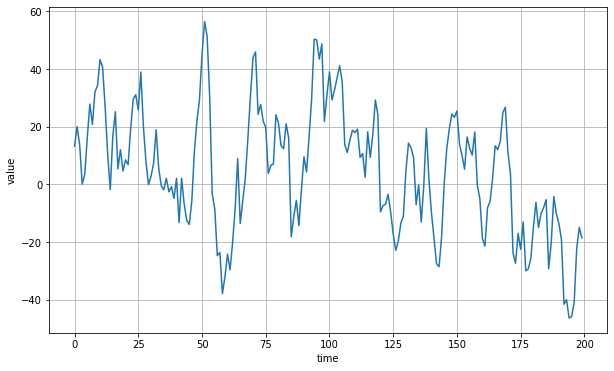

In [13]:
series = autocorrelation(time, 10)
plot_series(time[:200], series[:200])

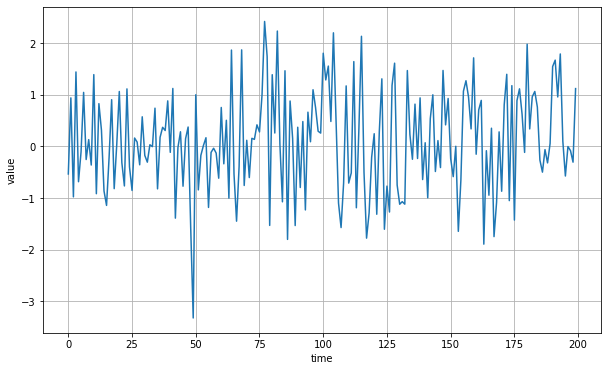

In [14]:
series = noise(time)
plot_series(time[:200], series[:200])

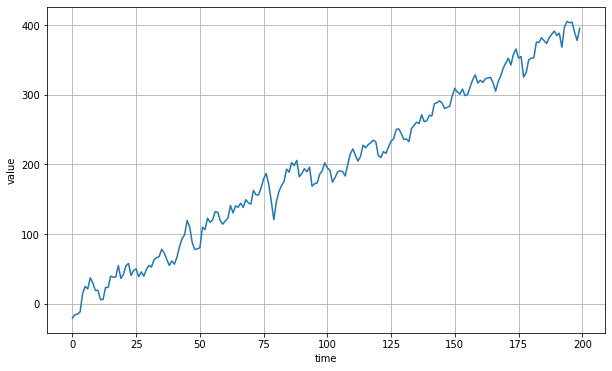

In [15]:
series = autocorrelation(time, 10) + trend(time, 2)
plot_series(time[:200], series[:200])

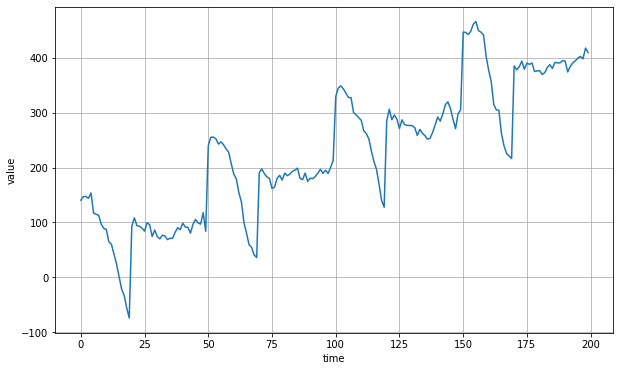

In [16]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])

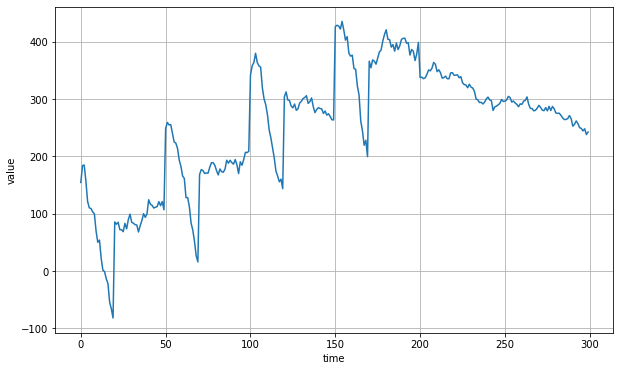

In [17]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]
#series += noise(time, 30)
plot_series(time[:300], series[:300])